In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori as apr
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns


#### Exercise:  Groceries

In [2]:
# loading the data set
df = pd.read_csv(r'groceries_one_hot.csv') # path needs to be reaplaced with your file path if running on another machine

C:\Users\Chaithra\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (17,30,90,91,125,142) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df

,soda,rice,berries,canned beer,canned vegetables,mustard,liquor,napkins,sauces,curd,...,bottled beer,dishes,brown bread,artif. sweetener,skin care,ready soups,specialty chocolate,decalcifier,cereals,shopping bags
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,T,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(9835, 169)

In [5]:
df.fillna(0, inplace=True)

In [6]:
df.replace('T',1,inplace=True)

In [7]:
df.head()

,soda,rice,berries,canned beer,canned vegetables,mustard,liquor,napkins,sauces,curd,...,bottled beer,dishes,brown bread,artif. sweetener,skin care,ready soups,specialty chocolate,decalcifier,cereals,shopping bags
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.shape

(9835, 169)

### Applying Apriori and Resulting

In [9]:
df_arr = apriori(df, min_support = 0.01,use_colnames = True, verbose = 1)
df_arr

Processing 604 combinations | Sampling itemset size 43


,support,itemsets
0,0.174377,(soda)
1,0.033249,(berries)
2,0.077682,(canned beer)
3,0.010778,(canned vegetables)
4,0.011998,(mustard)
...,...,...
328,0.015150,"(whole milk, yogurt, tropical fruit)"
329,0.010269,"(whole milk, yogurt, citrus fruit)"
330,0.010168,"(whipped/sour cream, yogurt, other vegetables)"
331,0.011490,"(yogurt, other vegetables, rolls/buns)"


In [10]:
df_rules = association_rules(df_arr, metric = "confidence", min_threshold = 0.01)
df_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(canned beer),(soda),0.077682,0.174377,0.013828,0.178010,1.020836,0.000282,1.004420
1,(soda),(canned beer),0.174377,0.077682,0.013828,0.079300,1.020836,0.000282,1.001758
2,(napkins),(soda),0.052364,0.174377,0.011998,0.229126,1.313969,0.002867,1.071022
3,(soda),(napkins),0.174377,0.052364,0.011998,0.068805,1.313969,0.002867,1.017655
4,(white bread),(soda),0.042095,0.174377,0.010269,0.243961,1.399044,0.002929,1.092038
...,...,...,...,...,...,...,...,...,...
613,"(tropical fruit, other vegetables)",(yogurt),0.035892,0.139502,0.012303,0.342776,2.457146,0.007296,1.309293
614,"(yogurt, other vegetables)",(tropical fruit),0.043416,0.104931,0.012303,0.283372,2.700550,0.007747,1.249001
615,(tropical fruit),"(yogurt, other vegetables)",0.104931,0.043416,0.012303,0.117248,2.700550,0.007747,1.083638
616,(yogurt),"(tropical fruit, other vegetables)",0.139502,0.035892,0.012303,0.088192,2.457146,0.007296,1.057359


#### Exercise:  Titanic Data Set

Look at the Titanic (training) dataset.  

Load this dataset and in Preprocessing, use Discretize to convert Numeric attributes into Nominal.  
First, play with the confidence measure.  

Try lowering the confidence to .8 in order to get more rules.

Now look at rules with Lift greater than 1 and as high Confidence as possible.  

Post three interesting rules.


In [11]:
titanic = pd.read_csv('titanic.csv')

In [12]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
titanic.shape

(891, 11)

In [26]:
# dropping id columns
titanic_rev = titanic.drop(['PassengerId','Ticket','Cabin'],axis=True)

In [27]:
titanic_rev.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [28]:
# converting numerical data to categorical
titanic_rev['Survived'].replace({0:'dead',1:'survived'}, inplace=True)
titanic_rev['SibSp'].replace({0:'0_sibSp',1:'1_sibSp',2:'2_sibSp',3:'3_sibSp',
                              4:'4_sibSp',5:'5_sibSp',8:'8_sibSp'}, inplace=True)
titanic_rev['Parch'].replace({0:'0_parch',1:'1_parch',2:'2_parch',3:'3_parch',
                              4:'4_parch',5:'5_parch',6:'6_parch',}, inplace=True)
titanic_rev['Pclass'].replace({1:'first',2:'second',3:'third'}, inplace=True)

<AxesSubplot:>

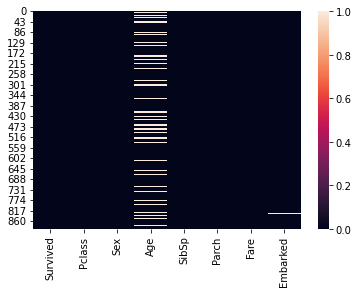

In [29]:
sns.heatmap(titanic_rev.isnull(), cbar=True) # Age and Embarked are having null values

In [34]:
# dropping the null value data points
titanic_rev.drop(titanic_rev[titanic_rev['Embarked'].isnull()].index, inplace=True)
titanic_rev.drop(titanic_rev[titanic_rev['Age'].isnull()].index, inplace=True)

<AxesSubplot:>

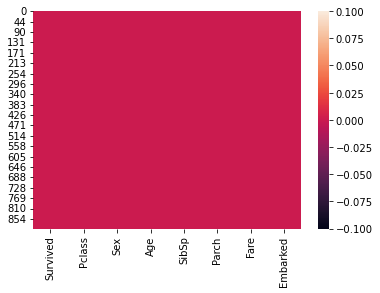

In [35]:
# after removing the null values
sns.heatmap(titanic_rev.isnull(), cbar=True)

In [36]:
titanic_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    object 
 1   Pclass    712 non-null    object 
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    object 
 5   Parch     712 non-null    object 
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), object(6)
memory usage: 50.1+ KB


In [37]:
# dicretization - converting nuerical to categorical 
titanic_rev['Age'] = pd.qcut(titanic_rev['Age'],3,labels=['young','middle_age','old'])
titanic_rev['Fare'] = pd.qcut(titanic_rev['Fare'],4,labels=['very_low_fare','low_fare','medium_fare','high_fare'])

In [38]:
titanic_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  712 non-null    object  
 1   Pclass    712 non-null    object  
 2   Sex       712 non-null    object  
 3   Age       712 non-null    category
 4   SibSp     712 non-null    object  
 5   Parch     712 non-null    object  
 6   Fare      712 non-null    category
 7   Embarked  712 non-null    object  
dtypes: category(2), object(6)
memory usage: 40.7+ KB


In [39]:
titanic_rev.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,712,712,712,712,712,712,712,712
unique,2,3,2,3,6,7,4,3
top,dead,third,male,young,0_sibSp,0_parch,very_low_fare,S
freq,424,355,453,246,469,519,191,554


In [50]:
rules = list(apr(titanic_rev[['Survived','Pclass','Sex','SibSp','Parch','Age','Fare']].values,
        min_support=0.2,
        min_confidence=0.8,
        min_lift=2,
        max_length=None))

In [51]:
len(rules)

8

In [52]:
for rule in rules:
    stat = rule.ordered_statistics[0]
   
    
    print('Rule: ', list(stat.items_base), ' -> ', list(stat.items_add))
    print("Support: " + str(rule[1]))

    print("Confidence: " + str(stat.confidence))
    print("Lift: " + str(stat.lift))
    print("-------------------------------------")

Rule:  ['very_low_fare']  ->  ['0_parch', 'third']
Support: 0.25702247191011235
Confidence: 0.9581151832460733
Lift: 2.584007615421228
-------------------------------------
Rule:  ['very_low_fare']  ->  ['third', '0_sibSp']
Support: 0.2401685393258427
Confidence: 0.8952879581151832
Lift: 2.5600201854538573
-------------------------------------
Rule:  ['very_low_fare']  ->  ['third', 'male']
Support: 0.22191011235955055
Confidence: 0.8272251308900522
Lift: 2.3280011588684473
-------------------------------------
Rule:  ['very_low_fare']  ->  ['0_parch', 'third', '0_sibSp']
Support: 0.2401685393258427
Confidence: 0.8952879581151832
Lift: 2.833089005235602
-------------------------------------
Rule:  ['dead', 'very_low_fare']  ->  ['0_parch', 'third']
Support: 0.20365168539325842
Confidence: 0.9539473684210527
Lift: 2.572767145135566
-------------------------------------
Rule:  ['very_low_fare']  ->  ['0_parch', 'third', 'male']
Support: 0.21769662921348315
Confidence: 0.8115183246073298
